# HW2_Task1

## 1. Introduction

task 1 requirement:<br>
Build a similar or improved neural network system and replicate his results. In
general, use the resources from NLTK as a corpus for supervised Neural Network training and development.
Use for example the Brown corpus or the Penn Treebank section, extract the language models, as for example
N-gram model of Part-of-Speech (PoS) tags, tokens and PoS-tags, and map them to input vectors, define
and train the model to generate a probability vector for PoS-tags for every token.

In this task, we firstly extract tokens and tags in brown corpus, and then vectorize it with a dictionary built use the same approach in last Assignment. After that, we build a simple LSTM model to run the data for prediction, and use both accuracy and f1 score as metrics.

## 2. Implementation

import the library for back up

In [1]:
import numpy as np
import nltk
import matplotlib.pyplot as plt


In [2]:
#keras
#here, i import the LSTM in keras for later use

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed
from keras.callbacks import EarlyStopping



Using TensorFlow backend.


In [3]:
#download brown corpus
from nltk.corpus import brown
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/jianwenliu/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/jianwenliu/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

we check the tokens and tags in the brown corpus

use the tokens and tags

In [4]:
tokens, tags = zip(*brown.tagged_words(tagset='universal'))

check the tokens in the corpus

In [5]:
tokens

('The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'The',
 'jury',
 'further',
 'said',
 'in',
 'term-end',
 'presentments',
 'that',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'of',
 'the',
 'election',
 ',',
 '``',
 'deserves',
 'the',
 'praise',
 'and',
 'thanks',
 'of',
 'the',
 'City',
 'of',
 'Atlanta',
 "''",
 'for',
 'the',
 'manner',
 'in',
 'which',
 'the',
 'election',
 'was',
 'conducted',
 '.',
 'The',
 'September-October',
 'term',
 'jury',
 'had',
 'been',
 'charged',
 'by',
 'Fulton',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'of',
 'possible',
 '``',
 'irregularities',
 "''",
 'in',
 'the',
 'hard-fought',
 'primary',
 'which',
 'was',
 'won',
 'by',
 'Mayor-nominate'

check the tags in the corpus

In [6]:
tags

('DET',
 'NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'VERB',
 'NOUN',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'VERB',
 '.',
 'DET',
 'NOUN',
 '.',
 'ADP',
 'DET',
 'NOUN',
 'VERB',
 'NOUN',
 '.',
 'DET',
 'NOUN',
 'ADV',
 'VERB',
 'ADP',
 'NOUN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADJ',
 'NOUN',
 '.',
 'DET',
 'VERB',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 '.',
 '.',
 'VERB',
 'DET',
 'NOUN',
 'CONJ',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 '.',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'DET',
 'NOUN',
 'VERB',
 'VERB',
 '.',
 'DET',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'VERB',
 'VERB',
 'ADP',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PRT',
 'VERB',
 'NOUN',
 'ADP',
 'ADJ',
 '.',
 'NOUN',
 '.',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'DET',
 'VERB',
 'VERB',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 '.',
 '.',
 'ADV',
 'DET',
 'ADJ',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'VERB',
 'VERB',
 '.',
 '.',
 'DET',
 'NOUN',
 'VERB',
 '.',
 '.',
 'ADP',
 'DE

format the tokens and tags into list for future processing

In [7]:
tokens = list(tokens)

In [8]:
tokens

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'The',
 'jury',
 'further',
 'said',
 'in',
 'term-end',
 'presentments',
 'that',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'of',
 'the',
 'election',
 ',',
 '``',
 'deserves',
 'the',
 'praise',
 'and',
 'thanks',
 'of',
 'the',
 'City',
 'of',
 'Atlanta',
 "''",
 'for',
 'the',
 'manner',
 'in',
 'which',
 'the',
 'election',
 'was',
 'conducted',
 '.',
 'The',
 'September-October',
 'term',
 'jury',
 'had',
 'been',
 'charged',
 'by',
 'Fulton',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'of',
 'possible',
 '``',
 'irregularities',
 "''",
 'in',
 'the',
 'hard-fought',
 'primary',
 'which',
 'was',
 'won',
 'by',
 'Mayor-nominate'

In [9]:
tags = list(tags)

build the dictionary for both tokens and POS tags

In [10]:
# token
token_count = {token: number for number, token in enumerate(set(tokens))}
#tag
tag_count = {tag: number for number, tag in enumerate(set(tags))}

In [11]:
token_count

{'gradient': 0,
 'bilingual': 1,
 'Festival': 2,
 'Kanin': 3,
 'Corruption': 4,
 'Chapter': 5,
 'underground': 6,
 'swarthy': 7,
 'DiMaggio': 8,
 'Siegfried': 9,
 'whenever': 10,
 'Successful': 11,
 'twice': 12,
 'stables': 13,
 'prescription': 14,
 'Debate': 15,
 'Right': 16,
 'soreness': 17,
 'By-word': 18,
 'matured': 19,
 'Worthy': 20,
 'Ambassador': 21,
 'Close-up': 22,
 'lapped': 23,
 'long-line': 24,
 'one-sixteenth': 25,
 'Tarzan': 26,
 "Beige's": 27,
 'sixty-day': 28,
 'cruise': 29,
 'universally': 30,
 'kilometers': 31,
 'variability': 32,
 'easier': 33,
 'reluctant': 34,
 'improves': 35,
 'paved': 36,
 'inconceivable': 37,
 'epicycle': 38,
 'Jazz': 39,
 'blob': 40,
 'prominent': 41,
 'belted': 42,
 'Accounting': 43,
 'Corp.': 44,
 'Franciscans': 45,
 'edgy': 46,
 'svelte': 47,
 'salon': 48,
 'anti-assignment': 49,
 "bustin'": 50,
 'Idaho': 51,
 "auctioneer's": 52,
 'compilation': 53,
 'curds': 54,
 'Squad': 55,
 'chlorides': 56,
 'reds': 57,
 'Headquarters': 58,
 'surprising

In [12]:
tag_count

{'ADV': 0,
 '.': 1,
 'PRT': 2,
 'NUM': 3,
 'ADP': 4,
 'DET': 5,
 'NOUN': 6,
 'VERB': 7,
 'CONJ': 8,
 'PRON': 9,
 'X': 10,
 'ADJ': 11}

In [13]:
#take the first sentence in the brown
brown.sents()[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## encoding tokens and tags with number

The logic here is as follows: <br>
For each token in the sentence, we check the correspondet number in the dictionary we built before for both tokens and tags.  <br>
In this way, we can vectorize the tokens and tags.

In [14]:
#encoding tokens with token no
def sentence_info_token_vec(tokens,token_count):
    sents_token_vec={}
    qi = 0
    for sent_number, token_in_sents in enumerate(brown.sents()):
        zhi = qi + len(token_in_sents)
        sent_token = tokens[qi: zhi]
        token_numbers   = [token_count[token] for token in sent_token]
        sents_token_vec[sent_number]=(token_numbers)
        qi=zhi
    return sents_token_vec

In [15]:
#encoding tags with tag no
def sentence_info_tag_vec(tags,tag_count):
    sents_tag_vec={}
    #in the for loop, we record the 
    qi = 0
    for sent_number, token_in_sents in enumerate(brown.sents()):
        zhi = qi + len(token_in_sents)
        sent_tag = tags[qi: zhi]
        tag_numbers   = [tag_count[tag] for tag in sent_tag]
        sents_tag_vec[sent_number]=(tag_numbers)
        qi=zhi
    return sents_tag_vec

In [16]:
#extract the token vectors
sents_token_vec=sentence_info_token_vec(tokens,token_count)

In [17]:
#check the token vector
sents_token_vec

{0: [21711,
  29467,
  51331,
  54419,
  34143,
  1364,
  14974,
  36140,
  47181,
  1452,
  12401,
  51670,
  22046,
  12407,
  52184,
  7036,
  52969,
  45406,
  31638,
  52030,
  44446,
  18204,
  15926,
  37101,
  17916],
 1: [21711,
  3206,
  30108,
  1364,
  41839,
  30133,
  18707,
  52030,
  12759,
  29982,
  21905,
  29650,
  53238,
  226,
  10579,
  13017,
  44240,
  1452,
  12759,
  12407,
  53238,
  7036,
  32239,
  12759,
  19887,
  33039,
  52314,
  1452,
  12759,
  29982,
  1452,
  2410,
  31638,
  11495,
  12759,
  46714,
  41839,
  226,
  12759,
  12407,
  51746,
  18319,
  17916],
 2: [21711,
  24321,
  19620,
  3206,
  10579,
  10813,
  38743,
  49086,
  29467,
  47081,
  52654,
  28935,
  593,
  26975,
  18401,
  28489,
  36236,
  1452,
  29372,
  7036,
  18204,
  31638,
  41839,
  12759,
  27089,
  22046,
  226,
  51746,
  37637,
  49086,
  22012,
  12063,
  32187,
  52107,
  17916],
 3: [7036,
  31330,
  8611,
  7212,
  55734,
  1452,
  33533,
  36236,
  51746,
  

In [18]:
#extract the tag vector
sents_tag_vec=sentence_info_tag_vec(tags,tag_count)

In [19]:
sents_tag_vec

{0: [5,
  6,
  6,
  11,
  6,
  7,
  6,
  5,
  6,
  4,
  6,
  11,
  6,
  6,
  7,
  1,
  5,
  6,
  1,
  4,
  5,
  6,
  7,
  6,
  1],
 1: [5,
  6,
  0,
  7,
  4,
  6,
  6,
  4,
  5,
  6,
  11,
  6,
  1,
  5,
  7,
  11,
  6,
  4,
  5,
  6,
  1,
  1,
  7,
  5,
  6,
  8,
  6,
  4,
  5,
  6,
  4,
  6,
  1,
  4,
  5,
  6,
  4,
  5,
  5,
  6,
  7,
  7,
  1],
 2: [5,
  6,
  6,
  6,
  7,
  7,
  7,
  4,
  6,
  11,
  6,
  6,
  6,
  6,
  2,
  7,
  6,
  4,
  11,
  1,
  6,
  1,
  4,
  5,
  11,
  6,
  5,
  7,
  7,
  4,
  6,
  6,
  6,
  6,
  1],
 3: [1,
  0,
  5,
  11,
  6,
  4,
  11,
  6,
  7,
  7,
  1,
  1,
  5,
  6,
  7,
  1,
  1,
  4,
  5,
  11,
  6,
  4,
  5,
  6,
  1,
  5,
  6,
  4,
  6,
  8,
  5,
  6,
  4,
  5,
  6,
  1,
  1],
 4: [5,
  6,
  7,
  9,
  7,
  7,
  4,
  11,
  4,
  6,
  6,
  8,
  6,
  6,
  1,
  7,
  11,
  8,
  11,
  8,
  0,
  11,
  1,
  1],
 5: [9, 7, 4, 6, 6, 7, 1, 2, 7, 5, 6, 7, 8, 7, 4, 5, 6, 4, 7, 8, 7, 9, 1, 1],
 6: [5,
  11,
  6,
  7,
  4,
  5,
  6,
  4,
  11,
  6,
  1,
  4,
  9

In [20]:
token_vecs=[]
for token_info in sents_token_vec.items():
    token_vecs.append(token_info[1])



# token_seqs = [token_info[1] for token_info in sents_token_vec.items()]

In [21]:
token_vecs

[[21711,
  29467,
  51331,
  54419,
  34143,
  1364,
  14974,
  36140,
  47181,
  1452,
  12401,
  51670,
  22046,
  12407,
  52184,
  7036,
  52969,
  45406,
  31638,
  52030,
  44446,
  18204,
  15926,
  37101,
  17916],
 [21711,
  3206,
  30108,
  1364,
  41839,
  30133,
  18707,
  52030,
  12759,
  29982,
  21905,
  29650,
  53238,
  226,
  10579,
  13017,
  44240,
  1452,
  12759,
  12407,
  53238,
  7036,
  32239,
  12759,
  19887,
  33039,
  52314,
  1452,
  12759,
  29982,
  1452,
  2410,
  31638,
  11495,
  12759,
  46714,
  41839,
  226,
  12759,
  12407,
  51746,
  18319,
  17916],
 [21711,
  24321,
  19620,
  3206,
  10579,
  10813,
  38743,
  49086,
  29467,
  47081,
  52654,
  28935,
  593,
  26975,
  18401,
  28489,
  36236,
  1452,
  29372,
  7036,
  18204,
  31638,
  41839,
  12759,
  27089,
  22046,
  226,
  51746,
  37637,
  49086,
  22012,
  12063,
  32187,
  52107,
  17916],
 [7036,
  31330,
  8611,
  7212,
  55734,
  1452,
  33533,
  36236,
  51746,
  30976,
  316

In [22]:
s_len=[]
for seq in token_vecs:
    s_len.append(len(seq))
s_len

[25,
 43,
 35,
 37,
 24,
 24,
 43,
 2,
 26,
 25,
 14,
 14,
 28,
 24,
 59,
 23,
 25,
 17,
 34,
 2,
 33,
 33,
 33,
 33,
 3,
 12,
 31,
 3,
 28,
 34,
 22,
 6,
 9,
 20,
 15,
 16,
 16,
 20,
 11,
 13,
 17,
 14,
 10,
 30,
 22,
 23,
 37,
 34,
 20,
 28,
 32,
 31,
 22,
 21,
 9,
 20,
 17,
 28,
 32,
 18,
 21,
 2,
 26,
 43,
 31,
 3,
 35,
 33,
 28,
 33,
 41,
 30,
 13,
 20,
 25,
 27,
 36,
 37,
 16,
 18,
 35,
 1,
 37,
 31,
 13,
 18,
 19,
 12,
 18,
 13,
 16,
 33,
 18,
 19,
 29,
 12,
 11,
 9,
 3,
 23,
 36,
 14,
 22,
 37,
 29,
 24,
 31,
 20,
 38,
 19,
 12,
 39,
 31,
 20,
 22,
 3,
 30,
 24,
 15,
 53,
 49,
 31,
 24,
 30,
 21,
 21,
 11,
 20,
 26,
 26,
 22,
 7,
 9,
 25,
 32,
 26,
 7,
 34,
 30,
 14,
 42,
 37,
 36,
 36,
 3,
 20,
 34,
 24,
 25,
 29,
 22,
 16,
 3,
 14,
 44,
 33,
 14,
 21,
 31,
 36,
 36,
 12,
 9,
 9,
 3,
 25,
 41,
 11,
 22,
 13,
 38,
 13,
 14,
 6,
 25,
 21,
 15,
 29,
 18,
 19,
 51,
 18,
 6,
 28,
 32,
 38,
 25,
 5,
 34,
 22,
 34,
 21,
 3,
 8,
 27,
 16,
 31,
 34,
 23,
 14,
 3,
 17,
 15,
 21,
 23,
 1

 Now we check the length of every sentence and its distribution

In [23]:
np.median(s_len)

18.0

In [24]:
np.percentile(s_len, 5)
np.percentile(s_len, 99)

62.0

In [25]:
#get the tag sequence
tag_vecs=[]
for tag_info in sents_tag_vec.items():
        tag_vecs.append(tag_info[1])

### zero padding and pre padding

we use zero padding for the vector and use "pre" since the otherwise the bi-lstm will have too "zero" information at th end and erase the "memory" it stored.

In [26]:
#select the max length for X and doing padding & trancating
max_len = 62
# where 62 equals 99 percentile of length

#padding for x
X = pad_sequences(maxlen=max_len, sequences=token_vecs, padding="pre", value=0)

In [28]:
X

array([[    0,     0,     0, ..., 15926, 37101, 17916],
       [    0,     0,     0, ..., 51746, 18319, 17916],
       [    0,     0,     0, ..., 32187, 52107, 17916],
       ...,
       [    0,     0,     0, ...,  5894, 11396, 17916],
       [    0,     0,     0, ..., 54269, 39605, 17916],
       [    0,     0,     0, ..., 51746, 21546, 17916]], dtype=int32)

In [29]:
X.shape

(57340, 62)

In [30]:
#padding for lab
y = pad_sequences(maxlen=max_len, sequences=tag_vecs, padding="pre", value=0)
y.shape

(57340, 62)

In [31]:
#choose a dimmension for word vector
# the typical word vector is 300, here for simplicity, I will choose 50m for test
wv_dim = 50

we use a lstm model for training

The lstm model have four layers: <br>
0.input<br>
1.embedding layer<br>
2.lstm layer<br>
3.output layer<br>

In [32]:


def lstm_model(max_len, input_size, wv_dim, output_dim):
    
    input = Input(shape=(max_len,), dtype='float64')
    embed = Embedding(input_dim=input_size, output_dim=wv_dim, input_length=max_len, embeddings_initializer='uniform')(input)    
    lstm = LSTM(units=100, return_sequences=True)(embed)
    out = TimeDistributed(Dense(output_dim, activation="softmax"))(lstm) 

    model = Model(input, out)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()
    
    return model

In [33]:
input_size = len(token_count)
output_dim = len(tag_count)

In [34]:
input_size

56057

In [35]:
# the dimmension of output, which eqauls the how many class we have
output_dim

12

get the labels

In [36]:
label=[]
for i in y:
    label.append(to_categorical(i, num_classes=output_dim))

split the train and test dataset

In [37]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)

In [39]:
model = lstm_model(max_len, input_size, wv_dim, output_dim)

history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(patience=2, monitor='val_loss')])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 62)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 62, 50)            2802850   
_________________________________________________________________
lstm_1 (LSTM)                (None, 62, 100)           60400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 62, 12)            1212      
Total params: 2,864,462
Trainable params: 2,864,462
Non-trainable params: 0
_________________________________________________________________
Train on 36697 samples, validate on 9175 samples
Epoch 1/10
36697/36697 [==============================] - 184s - loss: 0.4317 - acc: 0.8811 - val_loss: 0.0778 - val_acc: 0.9790
Epoch 2/10
36697/36697 [==============================] - 186s - loss: 0.0516 - acc: 0

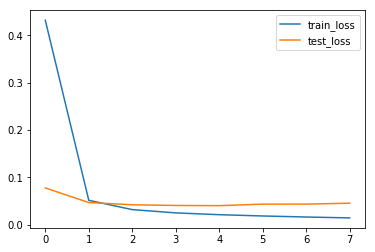

In [40]:
#plot the loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')   
plt.legend()
plt.show()

## prediction and mertics

prediction with test data

In [41]:
y_pred = model.predict(X_test)

the accuracy score

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(np.argmax(np.array(y_test), axis=-1).flatten(), np.argmax(y_pred, axis=-1).flatten())

In [43]:
acc

0.9858807678026936

the f1 score

In [44]:
from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=-1).flatten(), np.argmax(y_pred, axis=-1).flatten(), average='weighted')

In [45]:
f1

0.98583847608571

## 3. Conclusion

As shown abov, we use tokens and tags for generating an NN model for PoS-tags for every token.
Compared with the original paper, I used the LSTM model to try to capture more dependencies feature in time. I also used zero padding and pre padding in the feature extraction for improvement.The final F1 score is 0.98, which shows the it works for improvement.<br>
Disscusion: We may can test differen NN models for further improvement.For instance, Bi-lstm is a good choice to capture this long dependency relation in the text.